In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
import os

### Data Preparation
Membaca data menggunakan pandas:

In [28]:
col_names = ['id', 'Daerah', 'SumbuUtama', 'SumbuKecil', 'Keunikan', 'AreaBulatan', 'Diameter', 'KadarAir', 'Keliling', 'Bulatan', 'Ransum', 'Kelas']
df = pd.read_csv('Gandum.csv', delimiter=',', names = col_names)

Menampilkan *overview* dari data:

In [29]:
df

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,5781,128.288875,58.470846,0.890095,5954,85.793926,0.674090,316.756,0.724041,2.194066,1
1,2,4176,109.348294,49.837688,0.890098,4277,72.918093,0.596231,260.346,0.774227,2.194088,1
2,3,4555,114.427991,52.151207,0.890105,4706,76.155145,0.776641,279.606,0.732159,2.194158,1
3,4,4141,108.701191,49.457349,0.890499,4236,72.611879,0.633180,260.478,0.766960,2.197877,1
4,5,5273,122.747869,55.757848,0.890876,5431,81.937733,0.669842,302.730,0.723031,2.201446,1
5,6,5371,123.943530,56.235398,0.891145,5531,82.695644,0.734144,297.114,0.764573,2.204013,1
6,7,6332,135.249060,61.312148,0.891344,6528,89.789492,0.579747,328.799,0.736020,2.205910,1
7,8,5595,126.292008,57.238214,0.891398,5745,84.402460,0.621046,303.285,0.764378,2.206428,1
8,9,4664,115.859780,52.493440,0.891471,4826,77.060945,0.712170,282.980,0.731909,2.207129,1
9,10,5762,128.482339,58.165177,0.891658,5932,85.652824,0.659872,312.678,0.740608,2.208922,1


### Data Cleaning

Mengecek apakah terdapat data-data kosong. Data-data yang kosong perlu dibersihkan karena mampu mempengaruhi ketepatan nilai hasil perhitungan

In [30]:
df.isnull().sum()

id             0
Daerah         0
SumbuUtama     0
SumbuKecil     0
Keunikan       0
AreaBulatan    0
Diameter       0
KadarAir       0
Keliling       0
Bulatan        0
Ransum         0
Kelas          0
dtype: int64

Karena tidak terdapat data yang bernilai kosong, maka kita tidak perlu melakukan proses pembersihan data

### Data Processing
#### 1. Menulis deskripsi statistika (Descriptive Statistics) dari semua kolom pada data yang bersifat numerik

##### a) Mean

In [31]:
df.mean(numeric_only = True).round(3)

id              250.500
Daerah         4801.246
SumbuUtama      116.045
SumbuKecil       53.715
Keunikan          0.879
AreaBulatan    4937.048
Diameter         77.771
KadarAir          0.648
Keliling        281.480
Bulatan           0.762
Ransum            2.151
Kelas             1.502
dtype: float64

##### b) Median

In [32]:
df.median(numeric_only = True).round(3)

id              250.500
Daerah         4735.000
SumbuUtama      115.405
SumbuKecil       53.731
Keunikan          0.890
AreaBulatan    4857.000
Diameter         77.645
KadarAir          0.626
Keliling        280.045
Bulatan           0.761
Ransum            2.194
Kelas             2.000
dtype: float64

##### c) Modus

In [33]:
df.mode(numeric_only = True).round(3)

,id,Daerah,SumbuUtama,SumbuKecil,Keunikan,AreaBulatan,Diameter,KadarAir,Keliling,Bulatan,Ransum,Kelas
0,1,3992.0,74.133,39.907,0.720,3802.0,71.294,0.736,197.015,0.175,1.441,2.0
1,2,4881.0,74.364,41.436,0.726,4913.0,78.833,0.824,200.587,0.261,1.453,NaN
2,3,5642.0,74.692,42.872,0.731,NaN,84.756,NaN,202.456,0.299,1.466,NaN
3,4,6083.0,76.293,43.285,0.739,NaN,88.006,NaN,207.325,0.589,1.483,NaN
4,5,NaN,76.789,44.119,0.749,NaN,NaN,NaN,207.697,0.604,1.510,NaN
5,6,NaN,77.034,44.123,0.753,NaN,NaN,NaN,208.317,0.618,1.519,NaN
6,7,NaN,77.048,44.555,0.754,NaN,NaN,NaN,209.823,0.619,1.522,NaN
7,8,NaN,77.091,44.632,0.761,NaN,NaN,NaN,210.012,0.622,1.540,NaN
8,9,NaN,77.417,44.803,0.761,NaN,NaN,NaN,210.657,0.643,1.542,NaN
9,10,NaN,81.278,44.810,0.763,NaN,NaN,NaN,211.667,0.655,1.547,NaN


Dari tabel diatas, dapat kita lihat bahwa kolom **id**, **SumbuUtama**, **SumbuKecil**, **Keunikan**, **Keliling**, **Bulatan**, dan **Ransum** memiliki baris sepanjang 500. Hal tersebut berarti untuk kolom-kolom tersebut **tidak terdapat nilai modusnya** karena setiap nilainya bersifat unik. Kolom yang memiliki nilai modus adalah **Daerah**, **AreaBulatan**, **Diameter**, **KadarAir** dan **Kelas**.

Modus Daerah

In [34]:
df['Daerah'].mode().round(3)

0    3992
1    4881
2    5642
3    6083
dtype: int64

Modus AreaBulatan

In [35]:
df['AreaBulatan'].mode().round(3)

0    3802
1    4913
dtype: int64

Modus Diameter

In [36]:
df['Diameter'].mode().round(3)

0    71.294
1    78.833
2    84.756
3    88.006
dtype: float64

Modus KadarAir

In [37]:
df['KadarAir'].mode().round(3)

0    0.736
1    0.824
dtype: float64

Modus Kelas

In [38]:
df['Kelas'].mode().round(3)

0    2
dtype: int64

##### d) Standar Deviasi

In [39]:
df.std(numeric_only = True).round(3)

id              144.482
Daerah          986.395
SumbuUtama       18.283
SumbuKecil        4.071
Keunikan          0.037
AreaBulatan    1011.696
Diameter          8.057
KadarAir          0.094
Keliling         37.335
Bulatan           0.062
Ransum            0.250
Kelas             0.500
dtype: float64

##### e) Variansi

In [40]:
df.var(numeric_only = True).round(3)

id               20875.000
Daerah          972976.066
SumbuUtama         334.254
SumbuKecil          16.574
Keunikan             0.001
AreaBulatan    1023529.312
Diameter            64.913
KadarAir             0.009
Keliling          1393.932
Bulatan              0.004
Ransum               0.062
Kelas                0.250
dtype: float64

##### f) Range

In [41]:
(df.max(numeric_only = True)-df.min(numeric_only = True)).round(3)

id              499.000
Daerah         4931.000
SumbuUtama      153.795
SumbuKecil       29.071
Keunikan          0.194
AreaBulatan    5141.000
Diameter         40.747
KadarAir          0.469
Keliling        291.822
Bulatan           0.730
Ransum            1.024
Kelas             1.000
dtype: float64

##### g) Nilai minimum

In [42]:
df.min(numeric_only = True).round(3)

id                1.000
Daerah         2522.000
SumbuUtama       74.133
SumbuKecil       39.907
Keunikan          0.720
AreaBulatan    2579.000
Diameter         56.667
KadarAir          0.410
Keliling        197.015
Bulatan           0.175
Ransum            1.441
Kelas             1.000
dtype: float64

##### h) Nilai maksimum

In [43]:
df.max(numeric_only = True).round(3)

id              500.000
Daerah         7453.000
SumbuUtama      227.929
SumbuKecil       68.978
Keunikan          0.914
AreaBulatan    7720.000
Diameter         97.414
KadarAir          0.879
Keliling        488.837
Bulatan           0.905
Ransum            2.465
Kelas             2.000
dtype: float64

##### i) Kuartil & IQR

Kuartil 1

In [44]:
df.quantile(0.25, numeric_only = True).round(3)

id              125.750
Daerah         4042.750
SumbuUtama      104.116
SumbuKecil       51.194
Keunikan          0.864
AreaBulatan    4170.250
Diameter         71.745
KadarAir          0.573
Keliling        255.883
Bulatan           0.732
Ransum            1.984
Kelas             1.000
Name: 0.25, dtype: float64

Kuartil 2

In [45]:
df.quantile(0.5, numeric_only = True).round(3)

id              250.500
Daerah         4735.000
SumbuUtama      115.405
SumbuKecil       53.731
Keunikan          0.890
AreaBulatan    4857.000
Diameter         77.645
KadarAir          0.626
Keliling        280.045
Bulatan           0.761
Ransum            2.194
Kelas             2.000
Name: 0.5, dtype: float64

Kuartil 3

In [46]:
df.quantile(0.75, numeric_only = True).round(3)

id              375.250
Daerah         5495.500
SumbuUtama      129.047
SumbuKecil       56.325
Keunikan          0.908
AreaBulatan    5654.250
Diameter         83.649
KadarAir          0.727
Keliling        306.062
Bulatan           0.796
Ransum            2.382
Kelas             2.000
Name: 0.75, dtype: float64

IQR

In [47]:
(df.quantile(0.75, numeric_only = True)-df.quantile(0.25, numeric_only = True)).round(3)

id              249.500
Daerah         1452.750
SumbuUtama       24.931
SumbuKecil        5.132
Keunikan          0.044
AreaBulatan    1484.000
Diameter         11.903
KadarAir          0.154
Keliling         50.180
Bulatan           0.064
Ransum            0.398
Kelas             1.000
dtype: float64

##### j) Skewness

In [48]:
df.skew(numeric_only = True).round(3)

id             0.000
Daerah         0.238
SumbuUtama     0.762
SumbuKecil    -0.011
Keunikan      -1.623
AreaBulatan    0.258
Diameter       0.003
KadarAir       0.494
Keliling       0.734
Bulatan       -3.599
Ransum        -0.658
Kelas         -0.008
dtype: float64

##### k) Kurtosis

In [49]:
df.kurtosis(numeric_only = True).round(3)

id             -1.200
Daerah         -0.435
SumbuUtama      4.331
SumbuKecil      0.476
Keunikan        2.917
AreaBulatan    -0.410
Diameter       -0.466
KadarAir       -0.740
Keliling        2.273
Bulatan        29.975
Ransum         -0.429
Kelas          -2.008
dtype: float64

#### 2. Data Visualization

##### 2.1 Histogram

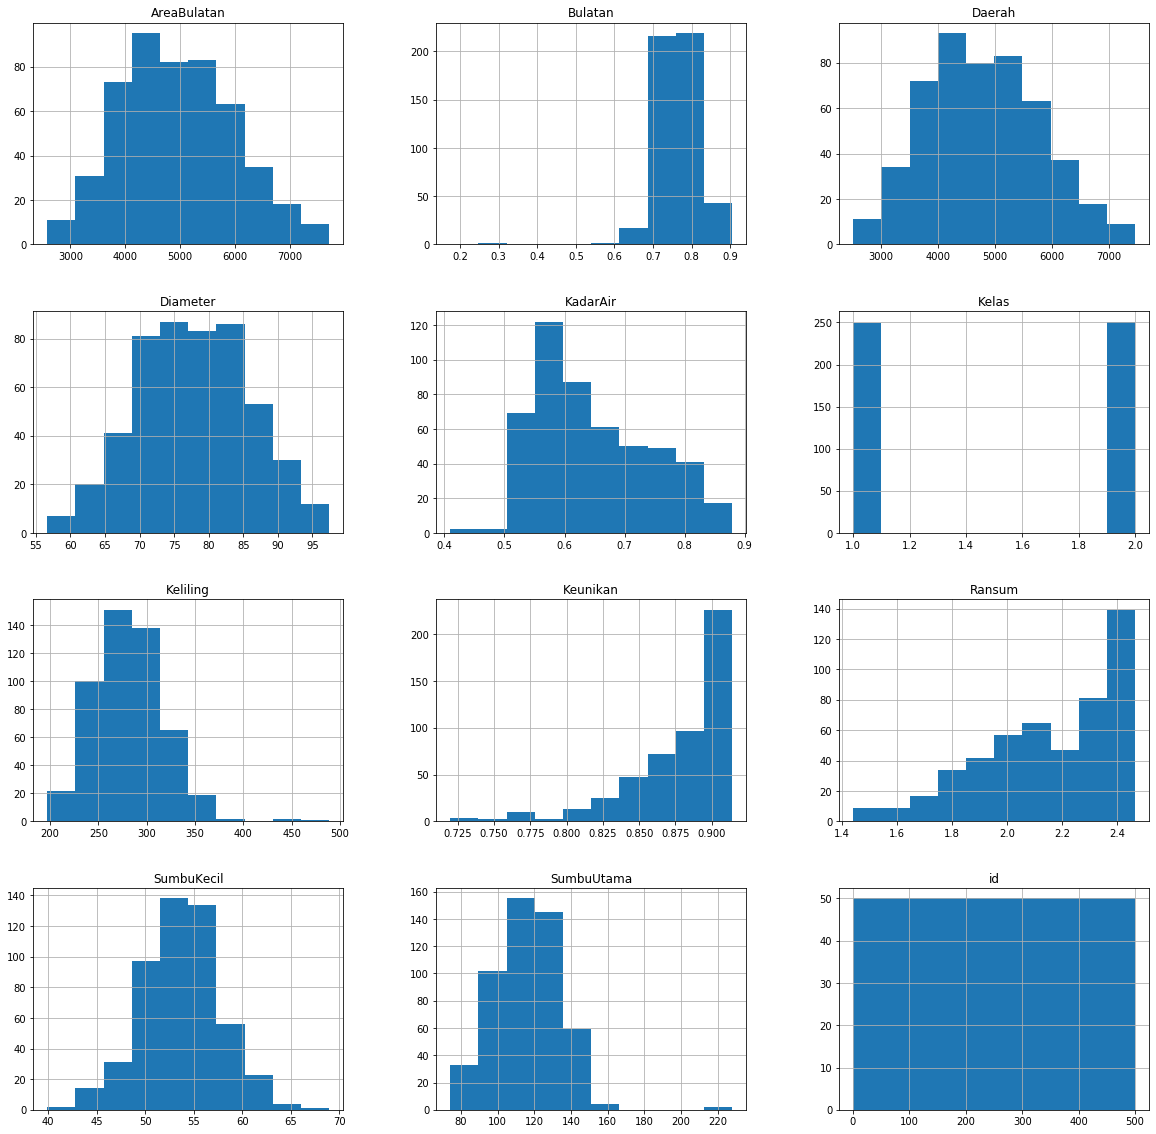

In [50]:
df.hist(figsize=(20,20))
plt.show()

INI BUAT TEXT INSIGHT DARI GRAFIK

##### 2.2 Boxplot

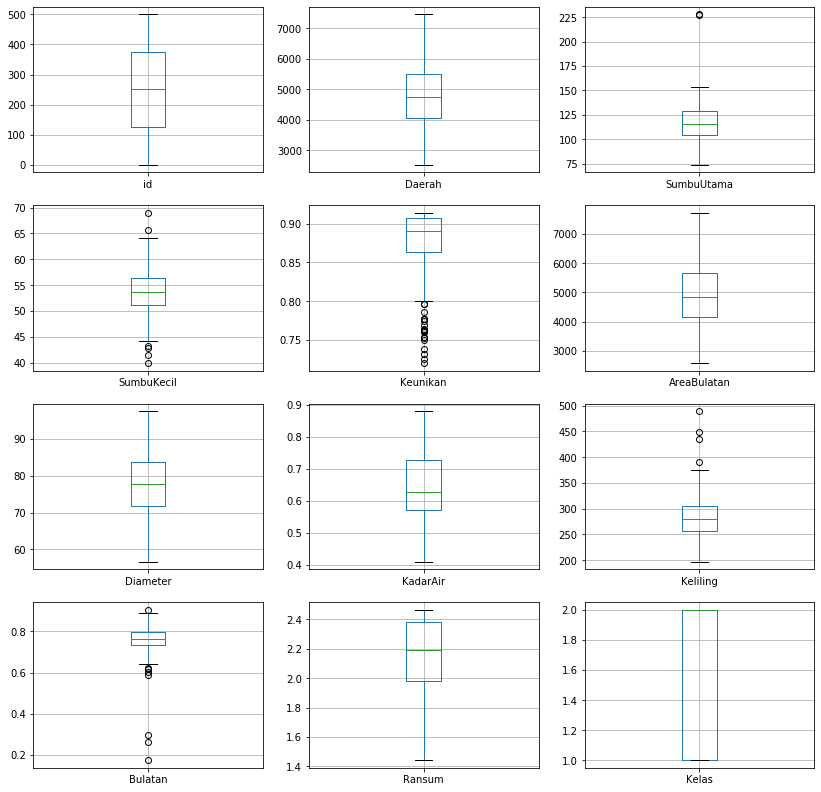

In [51]:
boxCols = 3
boxRows = math.ceil(len(df.columns)/boxCols)

fig, axes = plt.subplots(nrows=boxRows, ncols=boxCols, figsize=(14,14))

row = 0
for i, col in enumerate(df.columns):
    df.boxplot(column=col, ax=axes[row, i%boxCols])
    if i % boxCols == boxCols-1:
        row += 1

lastCol = (len(df.columns)+1)%boxCols-1
for i in range(boxCols*boxRows-len(df.columns)):
    fig.delaxes(axes[row, i+lastCol])
plt.show()

INI BUAT TEXT INSIGHT DARI GRAFIK

#### 3. Normality Test

Normality test yang akan dilakukan adalah normality test menggunakan histogram plot. Oleh karena itu, lihat kembali histogram plot dari setiap kolomnya.

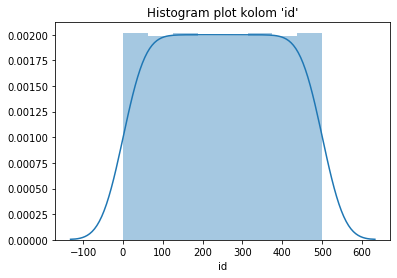

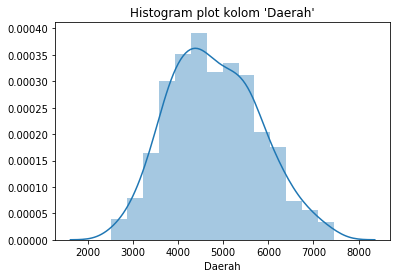

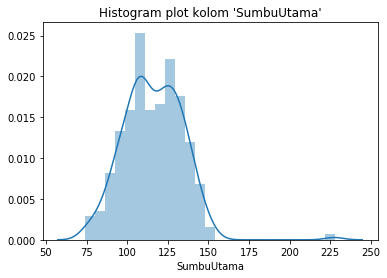

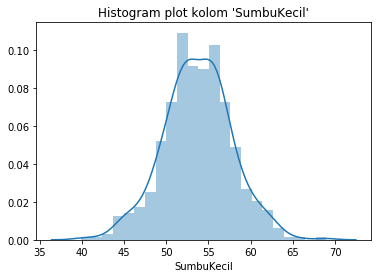

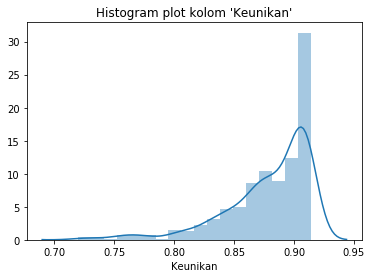

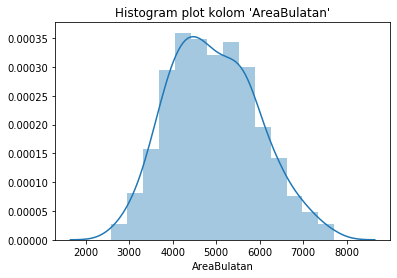

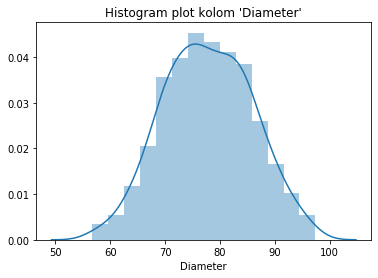

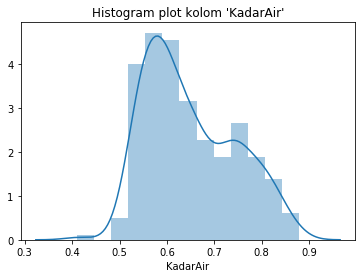

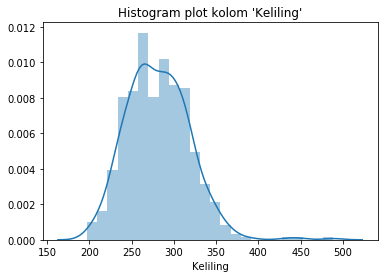

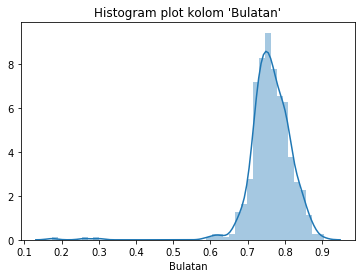

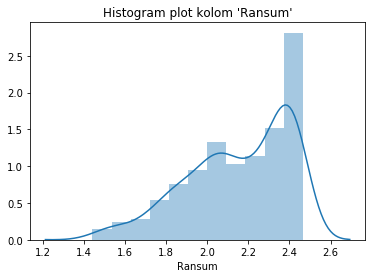

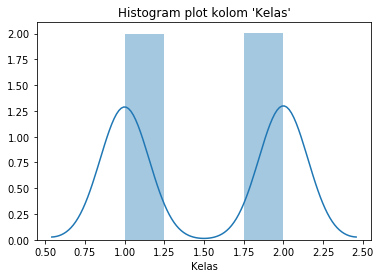

In [52]:
for col_name in df:
    sns.distplot(df[col_name])
    plt.title("Histogram plot kolom '" + str(col_name) + "'");
    plt.show()

Berdasarkan histogram plotnya, suatu kolom dapat dikatakan berdistribusi normal jika histogram plotnya memiliki bentuk *Gaussian Shape* atau sering juga kita ketahui sebagai grafik distribusi normal. Oleh karena itu, berdasarkan histogram yang terbentuk, dapat kita simpulkan bahwa kolom-kolom yang **berdistribusi normal** yaitu, kolom **AreaBulatan**, **Daerah**, **Diameter**, dan **SumbuKecil**

#### 4. Test Hipotesis 1 Sampel

#### 5. Test Hipotesis 2 Sampel

#### 6. Correlation Test